[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.386612   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.505295   
2023-02-16  153.509995  156.330002  153.350006  153.710007  152.893906   
2023-02-17  152.350006  153.000000  150.850006  152.550003  151.740051   
2023-02-21  150.199997  151.300003  148.410004  148.479996  147.691666   
...                ...         ...         ...         ...         ...   
2024-02-07  190.639999  191.050003  188.610001  189.410004  189.168625   
2024-02-08  189.389999  189.539993  187.350006  188.320007  188.080017   
2024-02-09  188.649994  189.990005  188.000000  188.850006  188.850006   
2024-02-12  188.419998  188.669998  186.789993  187.149994  187.149994   
2024-02-13  185.770004  186.210007  183.509995  185.039993  185.039993   

              Volume    Change  Insta

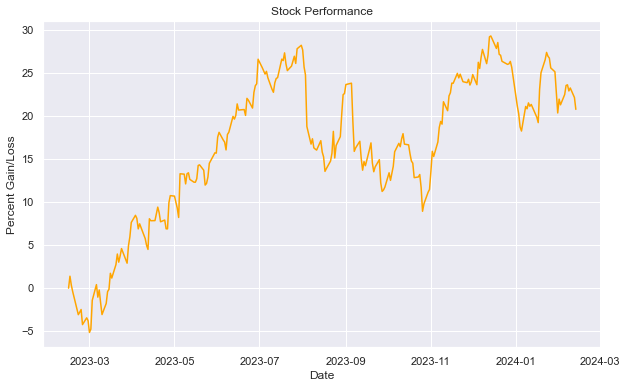

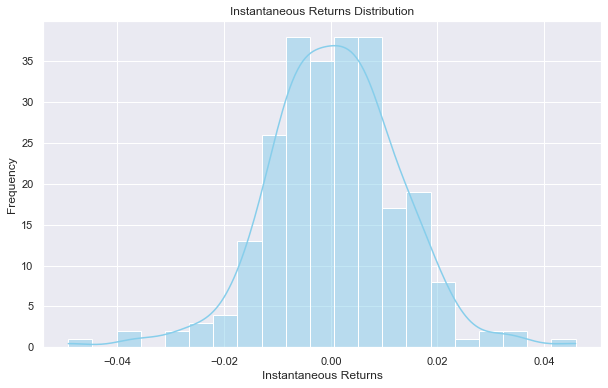

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
import yfinance as yf

sb.set_theme()

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    def get_data(self):
        """method that downloads data and stores in a DataFrame"""
        data = yf.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(data)
        return data

    def calc_returns(self, df):
        """method that adds change and return columns to data"""
        df['Change'] = df['Close'].diff()
        df['Instant_return'] = np.log(df['Close']).diff().round(4)

    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        plt.figure(figsize=(10, 6))
        sb.histplot(self.data['Instant_return'], kde=True, color='skyblue')
        plt.title('Instantaneous Returns Distribution')
        plt.xlabel('Instantaneous Returns')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def plot_performance(self):
        """method that plots stock object performance as percent"""
        plt.figure(figsize=(10, 6))
        performance = (self.data['Close'] / self.data['Close'].iloc[0] - 1) * 100
        plt.plot(self.data.index, performance, color='orange')
        plt.title('Stock Performance')
        plt.xlabel('Date')
        plt.ylabel('Percent Gain/Loss')
        plt.grid(True)
        plt.show()

def main():
    stock_symbol = 'AAPL'  # Example stock symbol
    test = Stock(symbol=stock_symbol)
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()

if __name__ == '__main__':
    main()